# Line detection
### Traditional computer vision approach

This book designed to test feasibility of traditional computer vision techniques to detect the boundaries of the field.

In [1]:
import cv2
from cv2 import imread, cvtColor, COLOR_BGR2RGB
from matplotlib import pyplot as plt
import numpy as np
from glob import glob
from ipywidgets import interact
%matplotlib inline

### Visualize test images

/Users/alexp/miniconda3/envs/AI_Development_CPU/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


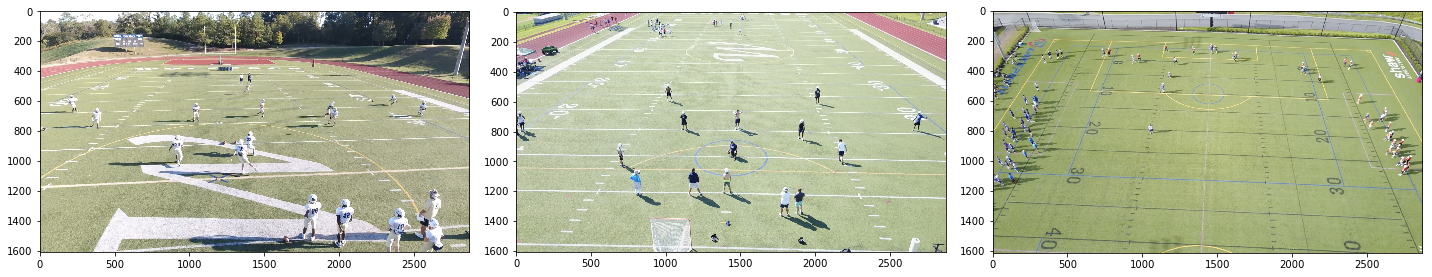

In [2]:
# load and show a test images
im_paths = glob("Test_Images/*.png")
ims = list(map(lambda x: cvtColor(imread(x), COLOR_BGR2RGB), im_paths))

f, s = plt.subplots(1, len(ims), figsize=[20,10])
for i in range(len(s)):
    s[i].imshow(ims[i])
f.tight_layout()
f.show()

### Line detection
Let's check what would be the best combination of color filters and thresholds

In [3]:
# Create a function to test various color filters
def color_maps(im, cmap):
    maps = {'rgb': None,'hls': cv2.COLOR_RGB2HLS, 'yuv': cv2.COLOR_RGB2YUV, "luv": cv2.COLOR_RGB2LUV, "lab": cv2.COLOR_RGB2LAB}
    assert cmap in maps.keys(), "Wrong color scheme provided {}. Available options are {}".format(cmap, maps.keys())
    cmap_im = cvtColor(im, maps[cmap]) if maps[cmap] is not None else im
    return cv2.split(cmap_im)

def thresholding(im, threshold):
    mask = np.zeros_like(im).astype(np.float32)
    mask[np.logical_or(im<threshold[0], im>threshold[1])] = 1.0
    return mask
    

def present_filters(im, cmaps, thresh_min, thresh_max):
    
    c1, c2, c3 = color_maps(im, cmaps)
    c1 = thresholding(c1, (thresh_min, thresh_max))
    c2 = thresholding(c2, (thresh_min, thresh_max))
    c3 = thresholding(c3, (thresh_min, thresh_max))
    
    im_list = [im, c1, c2, c3]
    f, s = plt.subplots(2,2, figsize=[20, 15])
    counter = 0
    for i in range(len(s)):
        for j in range(len(s[0])):
            im2plot = im_list[counter]
            s[i][j].set_title(cmaps[counter-1] if counter>0 else 'rgb')
            s[i][j].imshow(im2plot) if len(im2plot.shape)==3 else s[i][j].imshow(im2plot, cmap='gray')
            counter += 1
    
    f.tight_layout()
    f.show()

Widget Javascript not detected.  It may not be installed or enabled properly.


<function __main__.<lambda>>

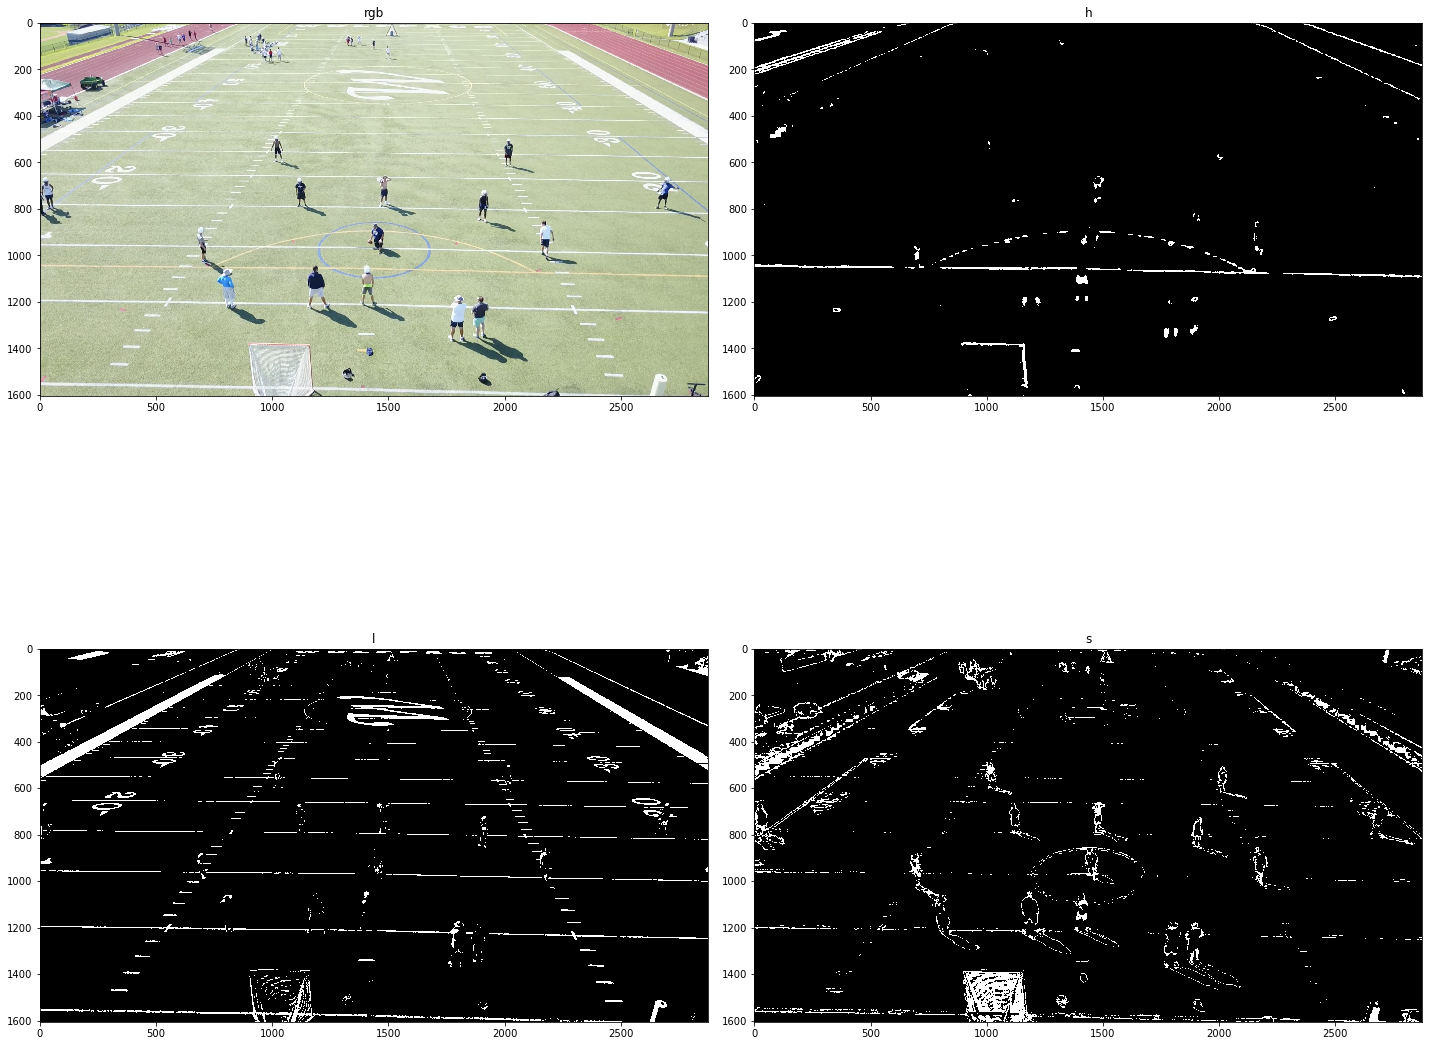

In [4]:
f = lambda im_id=1, cmap='hls', thresh_min=30, thresh_max=230: present_filters(ims[im_id], cmap, thresh_min, thresh_max)
interact(f, im_id=[0,1,2], cmap=['hls','rgb','yuv', 'luv', 'lab'],
         thresh_min=(0,254,1),
         thresh_max=(1,255,1))

The HLS representation of an image presented above prove that **L (light)** channel can provide important